In [4]:
import mglearn
import graphviz
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 나눔 폰트를 사용합니다.
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)
print(len(X_train), len(y_train), len(X_test), len(y_test))

mip = MLPClassifier(random_state=0)
    # 여기서 random은 뭐지?
mip.fit(X_train, y_train)
trainScore = mip.score(X_train, y_train)
testScore = mip.score(X_test, y_test)
print("=== 스케일링 '전' 정확도 ===")
print("훈련 세트 정확도 : ", trainScore)
print("테스트 세트 정확도 : ", testScore)

# MLP의 정확도는 높다는 것을 알 수 있다. 

# 정확도를 높일 수 있는 방법으로는
# scaling이 있다. 2가지 종류가 있는데, standardscaler와 min-maxScaler가 있다. 

# 그럼 standardScaler를 사용해보자!
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_trian_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test) 
    # y도 해야 하나? 왜 X_test는 transform만 시키지?

mip = MLPClassifier(random_state=0)
mip.fit(X_trian_scaled, y_train)
trainScore = mip.score(X_trian_scaled, y_train)
testScore = mip.score(X_test_scaled, y_test)
print("")
print("=== 스케일링 '후' 정확도 ===")
print("훈련 세트 정확도 : ", trainScore)
print("테스트 세트 정확도 : ", testScore)

# 아래 결과값을 확인해보면 스케일링 후 모델 정확도가 올라가는 것을 알 수 있다.


426 426 143 143
=== 스케일링 '전' 정확도 ===
훈련 세트 정확도 :  0.9272300469483568
테스트 세트 정확도 :  0.9300699300699301

=== 스케일링 '후' 정확도 ===
훈련 세트 정확도 :  0.9906103286384976
테스트 세트 정확도 :  0.965034965034965


c:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
# max_iter = 1000, alpha=1
mip = MLPClassifier(random_state=0, max_iter = 1000, alpha=1)
mip.fit(X_trian_scaled, y_train)
trainScore = mip.score(X_trian_scaled, y_train)
testScore = mip.score(X_test_scaled, y_test)
print("=== 학습반복과 규제를 조정한 '후' 정확도 ===")
print("훈련 세트 정확도 : ", trainScore)
print("테스트 세트 정확도 : ", testScore)

# 하이퍼파라미터를 조절하면 과대적합을 피하는 것을 볼 수 있다.
# 훈련세트에 대한 정확도는 줄지만
# 테스트세트에 대한 정확도는 올라간다.

=== 학습반복과 규제를 조정한 '후' 정확도 ===
훈련 세트 정확도 :  0.9882629107981221
테스트 세트 정확도 :  0.972027972027972


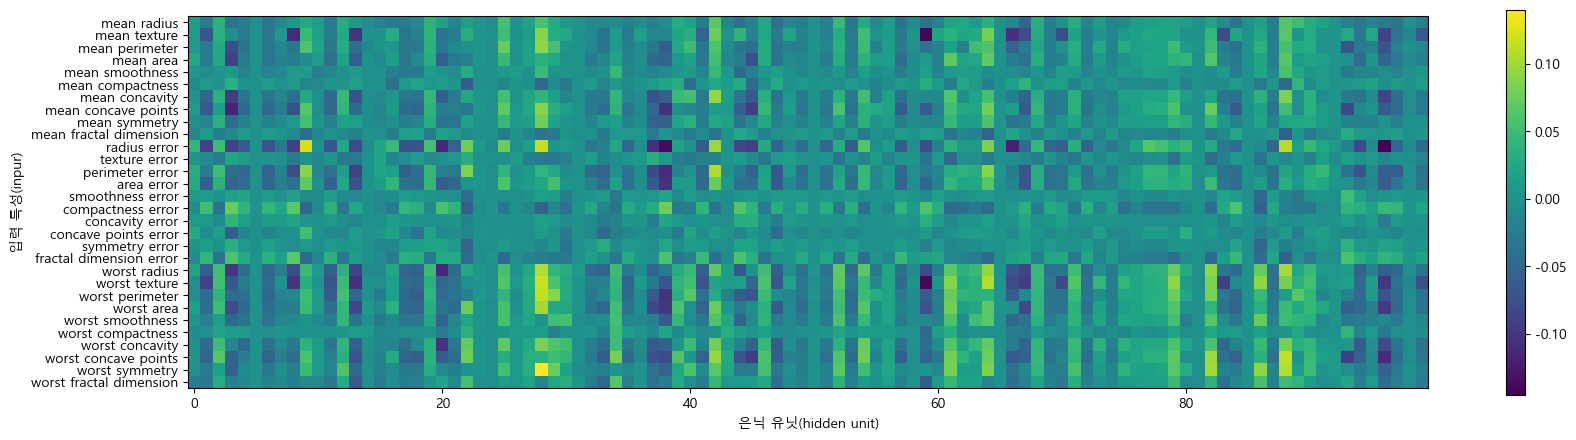

In [9]:
plt.figure(figsize=(20, 5))
plt.imshow(mip.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer['feature_names'])
plt.xlabel("은닉 유닛(hidden unit)")
plt.ylabel("입력 특성(inpur)")
plt.colorbar()

In [10]:
TrainScores = []
TestScores = []
xRange = [n for n in range(0, 1000, 1)]        

for number in xRange:
    mip = MLPClassifier(random_state=0, max_iter = f'{number}')
    mip.fit(X_trina_scaled, y_train)
    trainScore = mip.score(X_trian_scaled, y_train)
    testScore = mip.score(X_test_scaled, y_test)
    TrainScores.append(trainScore)
    TestScores.append(trainScore)

plt.plot(xRange, TrainScores,)

    

NameError: name 'X_trina_scaled' is not defined